<a href="https://colab.research.google.com/github/spring-board-b2-hate-speech/Group-8/blob/s_work/Final_Notebook/DL_Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Hate Speech Detection in Social Media Comment Section
**Develop a hate speech detection system capable identifying and classifying hate speech in comments sections of various Social media.**


## Project Overview

In the digital age, social media platforms face significant challenges in maintaining a safe and respectful online community, particularly with the proliferation of hate speech in user-generated comments.
The primary objective is to develop a robust hate speech detection system using advanced natural language processing (NLP) techniques to enhance content moderation capabilities on Social Media Platforms.
Efficient hate speech detection is pivotal for maintaining platform integrity and user trust, ensuring comments are following the Guidlines.

## Solution

This project aims to develop an AI model to detect hate speech in the Social Media comment Section. The model is trained using a labeled dataset and employs various natural language processing (NLP) techniques to identify and classify hate speech.

Steps:

**Data Preparation**: Collected and preprocessed data. The Preprocessing Involves various data cleaning steps and EDA for getting insights about the quality of the data.

**Model Development**: Implemented and optimized a Deep Learning model. Here we made use of TF-IDF embedding and a built a deep learning model involving various layers. The Model was trained on the cleaned data.

**Performance**: The Deep Learning models performance was then evaluated using various metrices but the main focus was on F1 score which is a combination of Precision and recall. The DL Model was able to achive a good F1 score making it effiecient for next step.

**Prediction**: Using DL Model for real-time detection on some of the comments to check how the model performs on real-time data.

## Dataset Description

The Dataset Contains 10,000 entries which are taken from the Hatespeech Curated Dataset from Kaggle. The Kaggle dataset is huge and tough while using so we decided to take nearly 10,000 rows from that big dataset and the ratio of hatespeech to non-hatespeech is 1:1 so as to have a balanced dataset.
The Dataset is simple it contains Text and Labels. The text contains the comments from various social medial platform combined in one and the label is state wheather it is hatespeech or not.


 ### Train & Test  data size:

 The Dataset after cleaning was split into train and test. The 80 % Data was used for training the model while 20 % for the testing perpose.

### Label wise split in train data:

As per stated early the dataset is combination of half hatespeech and other half Non-hatespeech. This is also followe in the Training and testing split, Both of them are having 50% Hatespeech and 50% Non hatespeech


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
df = pd.read_csv("Small_Hatespeech10k.csv")

# Data Description

### BASIC ANALYSIS

#### Dataset Information:

Function: info()

Purpose: Provides a concise summary of the DataFrame including the index dtype, column dtypes, non-null values, and memory usage.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          10000 non-null  object
 1   IsHatespeech  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


#### First Few Rows of the Dataset:

Function: head()

Purpose: Displays the first few rows of the dataset.

In [4]:
df.head()

,Text,IsHatespeech
0,frustratingly small please find an image at le...,0
1,padding cell padding class mainpagebg solid ve...,0
2,from the scenarios you present i see you belie...,0
3,i have to go inside you tomorrow i hate myself...,0
4,retweet china s bird flu outbreak good signs b...,0


#### Last Few Rows of the Dataset:

Function: tail()
    
Purpose: Displays the last few rows of the dataset.


In [5]:
df.tail()

,Text,IsHatespeech
9995,chastity is really the quality with girls the ...,1
9996,wow cannot be like these folks riding this sub...,1
9997,now you are such a mean nigger,1
9998,but i let them know girls don't run shit round...,1
9999,why does gavin williamson i still still work f...,1


#### Sum of Missing Values:

Function: isnull().sum()

Purpose: Computes the sum of missing values for each column

In [6]:
print(df.isnull().sum())

Text            0
IsHatespeech    0
dtype: int64


#### Columns in the Dataset:

Function: .columns
    
Purpose: Lists all the column names in the dataset.

In [7]:
df.columns


Index(['Text', 'IsHatespeech'], dtype='object')

#### Checking for Duplicates:

Function: duplicated().sum()
Purpose: Counts the number of duplicate rows in the dataset.
    
Function: drop_duplicated()
Purpose: Droping those duplicate rows.

In [8]:

print(df.duplicated().sum())
df = df.drop_duplicates()


7


***********************************************************************************
### Visual representation of the number of text rows having Hate-Speech and the ones Not having Hate-Speech#

IsHatespeech
1    4998
0    4995
Name: count, dtype: int64


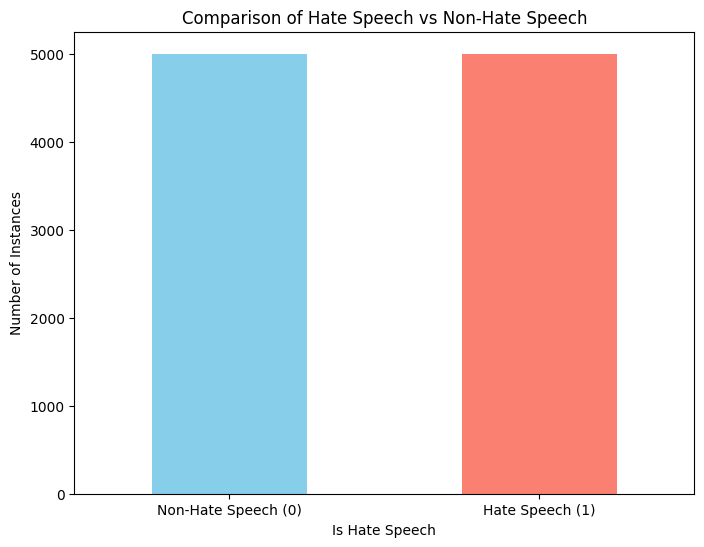

In [9]:

class_counts = df["IsHatespeech"].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Hate Speech vs Non-Hate Speech')
plt.xlabel('Is Hate Speech')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[0, 1], labels=['Non-Hate Speech (0)', 'Hate Speech (1)'], rotation=0)
plt.show()

# DATA CLEANING

#### Lowercasing: Convert all text to lowercase or uppercase to ensure consistency in text comparison. Python’s .lower()

In [10]:
df['Text'] = df['Text'].str.lower()


#### Check that the text only contains text in english and remove any other  

In [13]:
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['Text'].apply(is_english)]

#### Remove URLs, mentions, and hashtags

In [14]:
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    return text

df['Text'] = df['Text'].apply(remove_urls_mentions_hashtags)

#### Remove special characters and emojis

In [15]:

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['Text'] = df['Text'].apply(remove_special_characters)

#### Expanding the contractions to better identify the meaning of words

In [19]:
import contractions

def expand_contractions(text):
    expanded_words = [contractions.fix(word) for word in text.split()]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

df['Text'] = df['Text'].apply(expand_contractions)

#### Removing Punctuation and Numbers from the text

In [20]:
import string
def remove_noise(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    return text

df['Text'] = df['Text'].apply(remove_noise)



#### Tokenization: Tokenize the text data into words or subword units (tokens). This step is often done during data preprocessing but is fundamental to feature engineering.

In [21]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df['Text'] = df['Text'].astype(str)

df['tokens'] = df['Text'].apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Text,IsHatespeech,tokens
0,frustratingly small please find an image at le...,0,"[frustratingly, small, please, find, an, image..."
1,padding cell padding class mainpagebg solid ve...,0,"[padding, cell, padding, class, mainpagebg, so..."
2,from the scenarios you present i see you belie...,0,"[from, the, scenarios, you, present, i, see, y..."
3,i have to go inside you tomorrow i hate myself...,0,"[i, have, to, go, inside, you, tomorrow, i, ha..."
4,retweet china s bird flu outbreak good signs b...,0,"[retweet, china, s, bird, flu, outbreak, good,..."


#### Remove Common Stopwords: Depending on your analysis, you may want to remove common stopwords (e.g., “the,” “and,” “is”) to focus on more meaningful content.

In [22]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Lemmatization: Use lemmatization to reduce words to their base or dictionary form (e.g., “better” becomes “good”)

In [23]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = df['tokens'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...


#### Reassemble tokens into cleaned text

In [24]:

df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))


#### Create a feature for text length

In [25]:

df['text_length'] = df['clean_text'].apply(len)



In [26]:
df.head(3)

,Text,IsHatespeech,tokens,clean_text,text_length
0,frustratingly small please find an image at le...,0,"[frustratingly, small, please, find, image, le...",frustratingly small please find image least pi...,117
1,padding cell padding class mainpagebg solid ve...,0,"[padding, cell, padding, class, mainpagebg, so...",padding cell padding class mainpagebg solid ve...,1192
2,from the scenarios you present i see you belie...,0,"[scenario, present, see, believe, people, robo...",scenario present see believe people robot abra...,560


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9310 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          9310 non-null   object
 1   IsHatespeech  9310 non-null   int64 
 2   tokens        9310 non-null   object
 3   clean_text    9310 non-null   object
 4   text_length   9310 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 436.4+ KB


# EDA

#### Text Length Analysis
Text Length Distribution: Calculate and plot the distribution of text lengths.

Compare Text Length: Compare the text length distribution between hate speech and non-hate speech.

In [28]:

print(df.shape)
print(df.dtypes)


(9310, 5)
Text            object
IsHatespeech     int64
tokens          object
clean_text      object
text_length      int64
dtype: object


#### Visualizing the Text Length distribution in our dataset

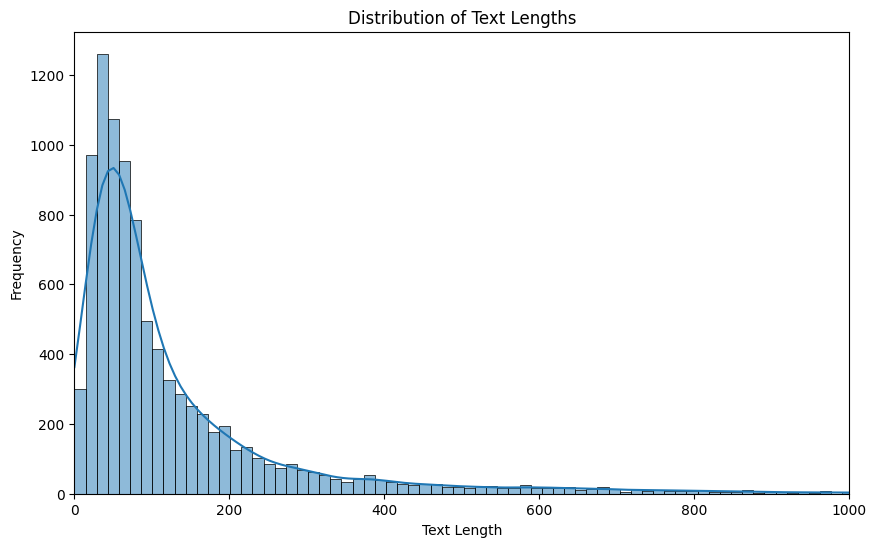

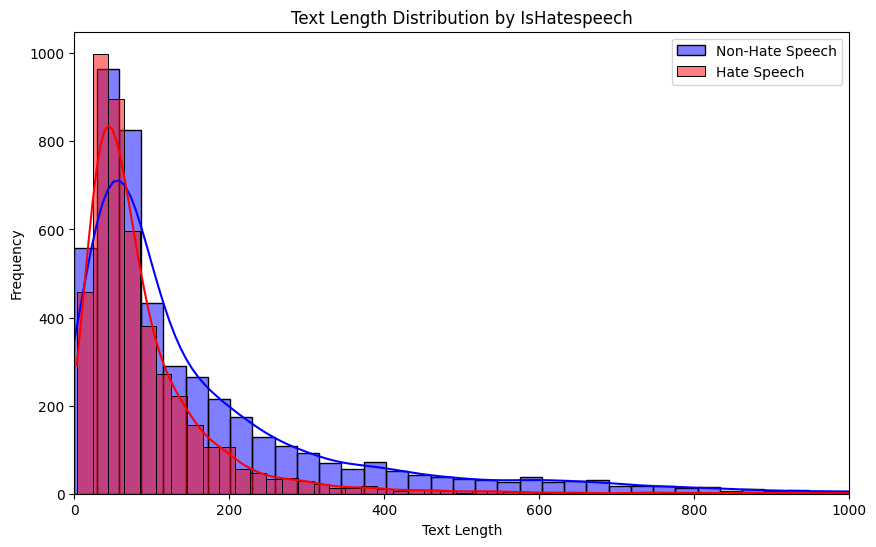

In [29]:
df['text_length'] = df['clean_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=100, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.xlim(0, 1000)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['IsHatespeech'] == 0]['text_length'], bins=50, color='blue', label='Non-Hate Speech', kde=True)
sns.histplot(df[df['IsHatespeech'] == 1]['text_length'], bins=50, color='red', label='Hate Speech', kde=True)
plt.title('Text Length Distribution by IsHatespeech')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 1000)
plt.show()


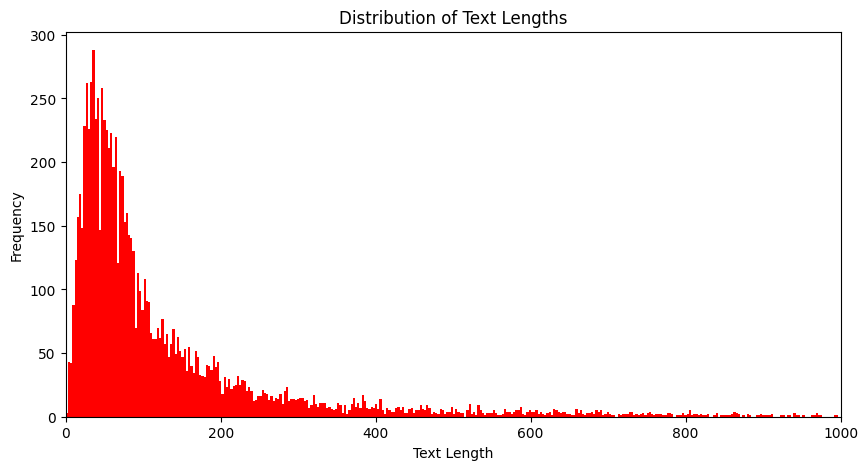

In [30]:

plt.figure(figsize=(10, 5))
df['text_length'].plot(kind='hist', bins=500, color='RED')
plt.title('Distribution of Text Lengths')
plt.xlim(0, 1000)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


### Word Frequency Analysis
#### Common Words: Identify and plot the most common words in the dataset.
#### Common Words by Class: Compare the most common words between hate speech and non-hate speech.

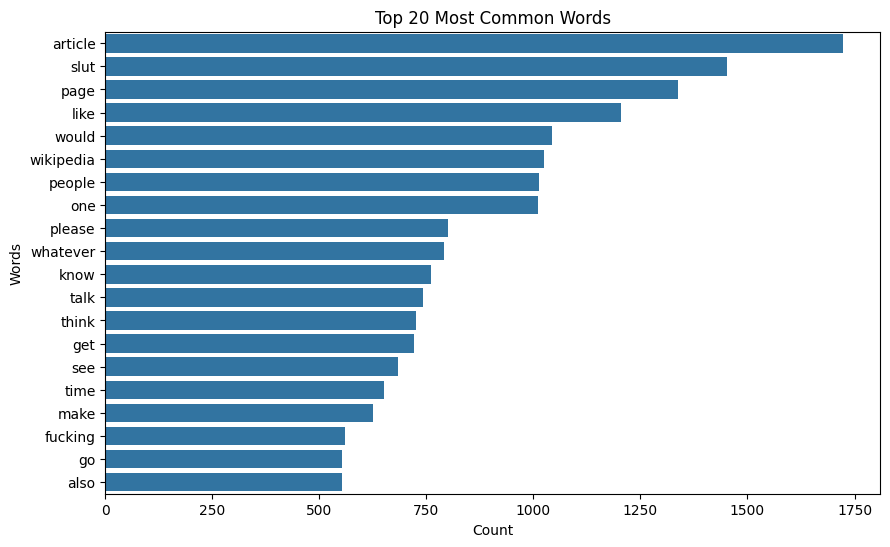

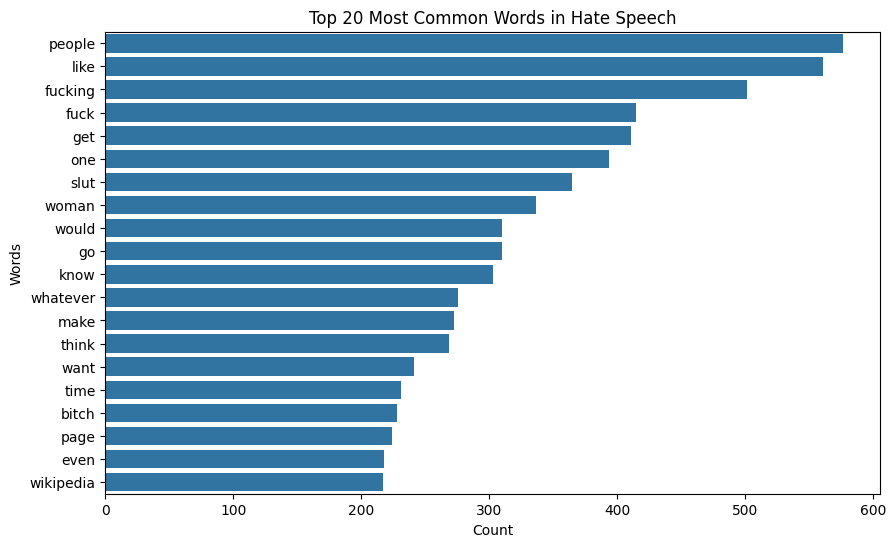

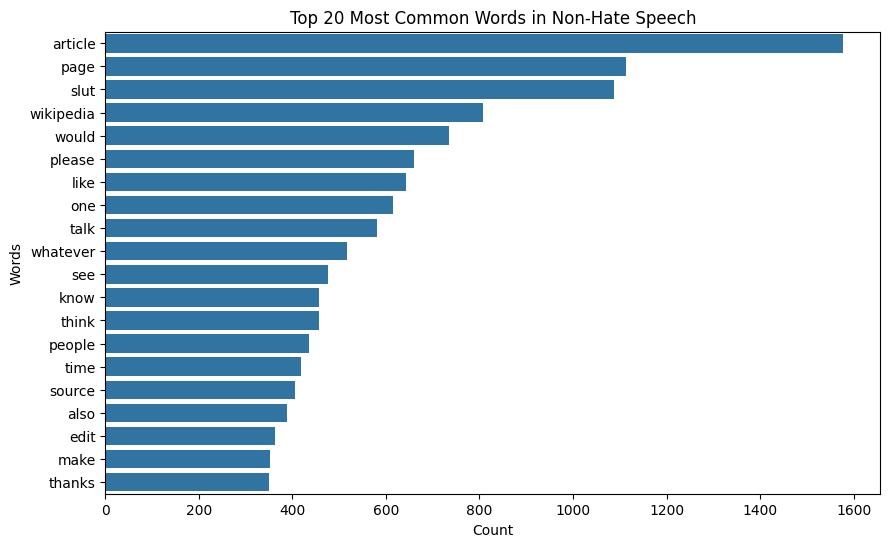

In [31]:

from collections import Counter

def word_frequencies(tokens):
    return Counter([word for token_list in tokens for word in token_list])


all_words = word_frequencies(df['tokens'])
common_words = all_words.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


hate_speech_words = word_frequencies(df[df['IsHatespeech'] == 1]['tokens'])
non_hate_speech_words = word_frequencies(df[df['IsHatespeech'] == 0]['tokens'])

common_hate_speech_words = hate_speech_words.most_common(20)
common_non_hate_speech_words = non_hate_speech_words.most_common(20)

hate_words, hate_counts = zip(*common_hate_speech_words)
non_hate_words, non_hate_counts = zip(*common_non_hate_speech_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(hate_counts), y=list(hate_words))
plt.title('Top 20 Most Common Words in Hate Speech')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=list(non_hate_counts), y=list(non_hate_words))
plt.title('Top 20 Most Common Words in Non-Hate Speech')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


### Word Tokenization
Word tokenization is the process of splitting a string of text into individual words or tokens. It is a fundamental step in natural language processing (NLP) and text mining tasks. By breaking down text into words, it allows for more detailed and granular analysis.

In [32]:
df['tokens'].head()

0    [frustratingly, small, please, find, image, le...
1    [padding, cell, padding, class, mainpagebg, so...
2    [scenario, present, see, believe, people, robo...
3    [go, inside, tomorrow, hate, every, time, feel...
4    [retweet, china, bird, flu, outbreak, good, si...
Name: tokens, dtype: object

#### The Dataset is mostly balanced and no need to perform any imbalanced data handling techniques on it.

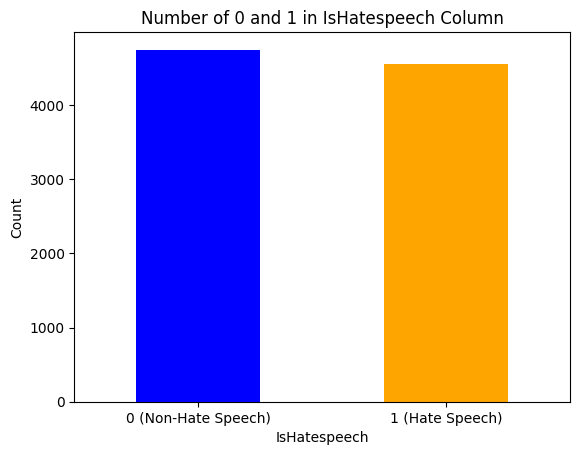

In [33]:
counts = df['IsHatespeech'].value_counts()
counts.plot(kind='bar', color=['blue', 'orange'])


plt.title('Number of 0 and 1 in IsHatespeech Column')
plt.xlabel('IsHatespeech')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (Non-Hate Speech)', '1 (Hate Speech)'], rotation=0)

plt.show()

In [34]:
df = df.dropna()

### Building Deep Learning Model

#### TF-IDF Embedding
After testing various embedding techninques TF-IDF was the best fit for our dataset and its performance was also good with reaspect to other techniques. A temporary ML model was used to determine this performance of embedding techniques.

Here the max_features parameter is choosen as 2500 after trying with various other values this provided the best benchmark score

#### Split of Dataset into Train and Test
The datset was split into two parts the training dataset which is about 80% dataset and testing dataset which is about 20% both taken at random state.

#### Model
The model consist of various levels with activation function "relu' used. The model was trained on the training data and then its performance was evaluated using the test data. The Performance score of the Model is below.
The visual representation of the classification report and Confusion matrix is also shown to get a better understanding of the models performance.

**Accuracy: 0.776047261009667**

**F1 Score: 0.7892875189489641**

**Precision: 0.7431018078020932**

**Recall: 0.8415948275862069**



Training Dataset shape : (7448,)
Test Dataset shape : (1862,)
Epoch 1/40
117/117 - 20s - loss: 0.5549 - precision_1: 0.6933 - recall_1: 0.7107 - accuracy: 0.7056 - val_loss: 0.4788 - val_precision_1: 0.7431 - val_recall_1: 0.8416 - val_accuracy: 0.7760 - lr: 0.0010 - 20s/epoch - 174ms/step
Epoch 2/40
117/117 - 11s - loss: 0.3343 - precision_1: 0.8347 - recall_1: 0.8882 - accuracy: 0.8597 - val_loss: 0.5057 - val_precision_1: 0.7553 - val_recall_1: 0.7651 - val_accuracy: 0.7594 - lr: 0.0010 - 11s/epoch - 97ms/step
Epoch 3/40
117/117 - 10s - loss: 0.1482 - precision_1: 0.9312 - recall_1: 0.9535 - accuracy: 0.9429 - val_loss: 0.8394 - val_precision_1: 0.7686 - val_recall_1: 0.7231 - val_accuracy: 0.7535 - lr: 0.0010 - 10s/epoch - 85ms/step
Epoch 4/40
117/117 - 7s - loss: 0.0486 - precision_1: 0.9795 - recall_1: 0.9840 - accuracy: 0.9821 - val_loss: 1.1474 - val_precision_1: 0.7551 - val_recall_1: 0.7511 - val_accuracy: 0.7546 - lr: 0.0010 - 7s/epoch - 58ms/step
59/59 [====================

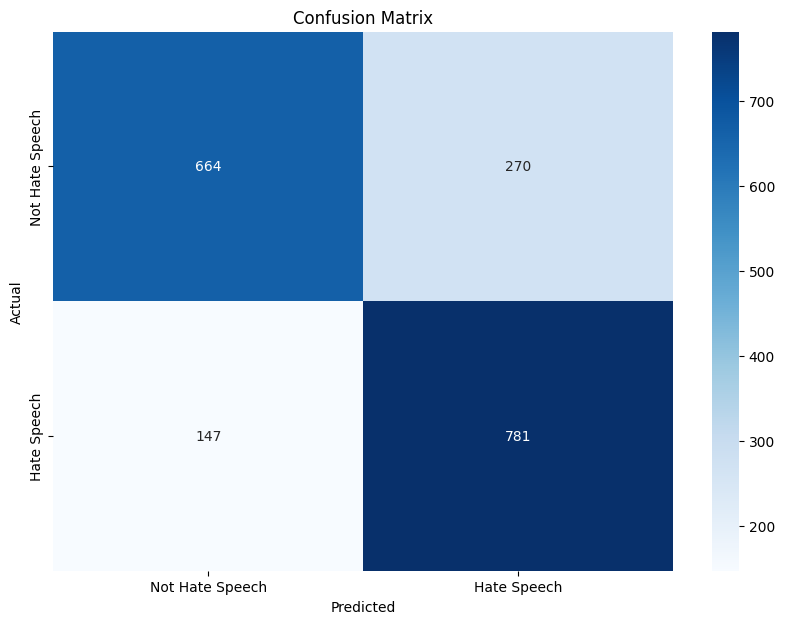

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

X = df['clean_text']
y = df['IsHatespeech']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Dataset shape :",X_train.shape)
print("Test Dataset shape :",X_test.shape)

tfidf_vectorizer = TfidfVectorizer(max_features=2500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

model = Sequential()
model.add(Dense(1024, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),'accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0005)


history = model.fit(X_train_tfidf, y_train, epochs=40, batch_size=64, validation_data=(X_test_tfidf, y_test), verbose=2, callbacks=[early_stopping, reduce_lr])

y_pred_prob = model.predict(X_test_tfidf)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

print("Deep Learning Model Performance with TF-IDF:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Hate Speech', 'Hate Speech'], yticklabels=['Not Hate Speech', 'Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### Prediction:

**Code that takes a sample of 3 or 4 texts as input and prints the prediction beside the
text.**

In [41]:

def preprocess_text(text):
    # Includes a function which contained all the datacleaning shown above in the notebook
    return text

def predict_hate_speech(text):
    preprocessed_text = preprocess_text(text)
    text_tfidf = tfidf_vectorizer.transform([preprocessed_text]).toarray()
    prediction_prob = model.predict(text_tfidf)
    text_tfidf
    prediction = (prediction_prob > 0.5).astype("int32").flatten()
    return "Hate Speech" if prediction[0] == 1 else "Not Hate Speech"

sample_texts = [
    "the sun is bright today",
    "hahaha gnaa screw ass hell vandal rule",
    "driving that bmw is best experience",
    "boy scout boy dog scout faggot bet anything would like mormon semen white face",
    "fuck gone",
    "sorry loss u",
    "oh close english mean cool k would critical satirical newspaper column accurate thanks",
    "Karim, fuck you",

]

for text in sample_texts:
    print(f"Text: {text}")
    print(f"Prediction: {predict_hate_speech(text)}")
    print()


Text: the sun is bright today
1/1 [==============================] - 0s 67ms/step
Prediction: Not Hate Speech

Text: hahaha gnaa screw ass hell vandal rule
1/1 [==============================] - 0s 38ms/step
Prediction: Hate Speech

Text: driving that bmw is best experience
1/1 [==============================] - 0s 42ms/step
Prediction: Not Hate Speech

Text: boy scout boy dog scout faggot bet anything would like mormon semen white face
1/1 [==============================] - 0s 34ms/step
Prediction: Hate Speech

Text: fuck gone
1/1 [==============================] - 0s 47ms/step
Prediction: Hate Speech

Text: sorry loss u
1/1 [==============================] - 0s 41ms/step
Prediction: Not Hate Speech

Text: oh close english mean cool k would critical satirical newspaper column accurate thanks
1/1 [==============================] - 0s 44ms/step
Prediction: Not Hate Speech

Text: Karim, fuck you
1/1 [==============================] - 0s 47ms/step
Prediction: Hate Speech



All the predictions made by the model were correct. So we can make practical use of this model to determine the hatespeech comments and tag them accordingly.

In [42]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

with open('Hatespeech_Model.pkl', 'wb') as file:
    pickle.dump(model, file)